# Model 1 - Horizontal stratigraphic

This is the most simpel model of horizontally stacked layers. We start by importing the necessary dependencies:

In [6]:
# These two lines are necessary only if GemPy is not installed
import sys, os
#sys.path.append("../..")
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=cpu"

# Importing GemPy
import gempy as gp

# Embedding matplotlib figures in the notebooks
%matplotlib inline

# Importing auxiliary libraries
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

Creating the model by importing the input data and displaying it:

In [462]:
geo_data = gp.create_data([0,1000,0,1000,0,1000],resolution=[50,50,50], 
                        path_o = os.pardir+"/data/input_data/jan_models/model1_orientations.csv",
                        path_i = os.pardir+"/data/input_data/jan_models/model1_surface_points.csv") 

Active grids: ['regular']


Setting and ordering the units and series:

In [463]:
gp.map_series_to_surfaces(geo_data, {"Strat_Series": ('rock2','rock1'),"Basement_Series":('basement')})

,surface,series,order_surfaces,isBasement,color,id
0,rock2,Strat_Series,1,False,#015482,1
1,rock1,Strat_Series,2,False,#9f0052,2
2,basement,Basement_Series,1,True,#ffbe00,3


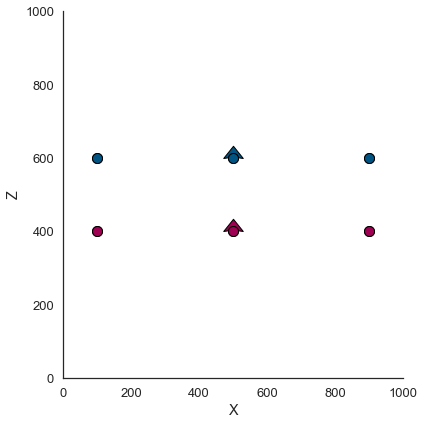

In [464]:
%matplotlib inline
gp.plot.plot_data(geo_data, direction='y')

Calculating the model:

In [465]:
interp_data = gp.set_interpolation_data(geo_data, compile_theano=True,
                                        theano_optimizer='fast_run')

Compiling theano function...
Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!


In [466]:
combined_grid = gp.core.data.Grid()
combined_regular_grid = combined_grid.set_regular_grid(extent=[0, 1000, 0, 1000, 0, 1000], resolution=[100,100,50])
combined_solution = gp.core.model.Solution(grid=combined_grid, surfaces=geo_data.surfaces, series=geo_data.series)

In [467]:
def define_subgrids(grid, n):
    """
    Given a gempy grid, define n by n sub grids that split the grid on the x and y extent
    """
    grid_resolution = grid.regular_grid.resolution
    grid_extent = grid.regular_grid.extent
    minx, miny, minz = grid_extent[0::2]
    maxx, maxy, maxz = grid_extent[1::2]
    newxres = grid_resolution[0] // n
    newyres = grid_resolution[1] // n
    x_step = (maxx-minx) // n
    y_step = (maxy-miny) // n
    results = []
    for x in np.arange(minx, maxx, x_step):
        for y in np.arange(miny, maxy, y_step):
            results.append(([x, x+x_step, y, y+y_step, minz, maxz], [newxres, newyres, grid_resolution[-1]]))
    return results
    

In [468]:
grids = define_subgrids(combined_grid, 2)

In [469]:
grids

[([0.0, 500.0, 0.0, 500.0, 0.0, 1000.0], [50, 50, 50]),
 ([0.0, 500.0, 500.0, 1000.0, 0.0, 1000.0], [50, 50, 50]),
 ([500.0, 1000.0, 0.0, 500.0, 0.0, 1000.0], [50, 50, 50]),
 ([500.0, 1000.0, 500.0, 1000.0, 0.0, 1000.0], [50, 50, 50])]

In [470]:
solutions = []
#grids = [[0,1000,0,500,0,1000],[0,1000,500,1000,0,1000]]
gp.compute_model(geo_data) # Todo remove?
for extent, res in grids:
    grid = gp.core.data.Grid()
    grid.set_regular_grid(extent=extent, resolution=res)
    geo_data.set_regular_grid(extent, res)
    sol = gp.compute_model(geo_data, output='geology', compute_mesh=False, set_solutions=False, 
                           reset_scalar=False, reset_block=False, reset_weights=False)
    solutions.append((extent,grid,sol))
    

/Users/andrew/PycharmProjects/gempy/gempy/core/solution.py:260: UserWarning: Attribute error. Using non masked marching cubesmarching_cubes_lewiner() got an unexpected keyword argument 'mask'.
  warnings.warn('Attribute error. Using non masked marching cubes' + str(e)+'.')


Active grids: ['regular']
Active grids: ['regular']
Active grids: ['regular']
Active grids: ['regular']


In [404]:
gp.core.grid_modules.grid_types.RegularGrid.create_regular_grid_3d([0, 10, 0, 10, 0, 10], [10, 10, 10])

array([[0.5, 0.5, 0.5],
       [0.5, 0.5, 1.5],
       [0.5, 0.5, 2.5],
       ...,
       [9.5, 9.5, 7.5],
       [9.5, 9.5, 8.5],
       [9.5, 9.5, 9.5]])

In [401]:
c = {'x': np.arange(0, 5), 'y': np.arange(0, 5), 'z': np.arange(0, 10)}
foo.loc[c] = 1
foo.values.ravel()

array([  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [395]:
foo.values.shape

(10, 10, 10)

In [412]:
combined_grid.regular_grid.resolution

array([ 50, 100,  50])

In [417]:
v = combined_grid.regular_grid.values.T

In [423]:
np.unique(v[0]).shape

(50,)

In [424]:
combined_grid.regular_grid.resolution

array([ 50, 100,  50])

In [406]:
combined_grid.regular_grid.resolution

array([ 50, 100,  50])

In [509]:
def update_xarray_grid(target, grid, values):
    v = grid.regular_grid.values.T
    c = {'x': np.unique(v[0]), 
         'y': np.unique(v[1]), 
         'z': np.unique(v[2])}
    print(c['z'][0:10])
    target.loc[c] = values


def do_combine_grids(target_grid, solutions):
    extent = target_grid.regular_grid.extent
    res = target_grid.regular_grid.resolution
    print(extent, res, target_grid.regular_grid.get_dx_dy_dz())
    v = target_grid.regular_grid.values.T
    c = {'x': np.unique(v[0]), 'y': np.unique(v[1]), 'z': np.unique(v[2])}
    print(c['z'][0:10])
    target_array = xr.DataArray(np.zeros(res), coords=c, dims=['x','y','z'])
    # make big loop
    for _, g, s in solutions:
        vv = g.regular_grid.values.T
        print(np.unique(v[2])-np.unique(vv[2]))
        l0, l1 = g.get_grid_args('regular')
        x_l = g.length[-1]
        # extract values we need
        v0 = np.asarray(s[0][0, l0: l1])
        # assign the xarray using the coordinates of the grid
        update_xarray_grid(target_array, g, v0)
    return target_array
    
    
    

In [510]:
x= do_combine_grids(combined_grid, solutions);

[   0. 1000.    0. 1000.    0. 1000.] [100 100  50] (10.0, 10.0, 20.0)
[  5.          25.20408163  45.40816327  65.6122449   85.81632653
 106.02040816 126.2244898  146.42857143 166.63265306 186.83673469]
[-5.         -4.79591837 -4.59183673 -4.3877551  -4.18367347 -3.97959184
 -3.7755102  -3.57142857 -3.36734694 -3.16326531 -2.95918367 -2.75510204
 -2.55102041 -2.34693878 -2.14285714 -1.93877551 -1.73469388 -1.53061224
 -1.32653061 -1.12244898 -0.91836735 -0.71428571 -0.51020408 -0.30612245
 -0.10204082  0.10204082  0.30612245  0.51020408  0.71428571  0.91836735
  1.12244898  1.32653061  1.53061224  1.73469388  1.93877551  2.14285714
  2.34693878  2.55102041  2.75510204  2.95918367  3.16326531  3.36734694
  3.57142857  3.7755102   3.97959184  4.18367347  4.3877551   4.59183673
  4.79591837  5.        ]
[ 10.  30.  50.  70.  90. 110. 130. 150. 170. 190.]


KeyError: "not all values found in index 'z'"

In [497]:
combined_grid.regular_grid.extent,combined_grid.regular_grid.resolution

(array([   0., 1000.,    0., 1000.,    0., 1000.]), array([100, 100,  50]))

In [489]:
solutions[0][1].regular_grid.extent,solutions[0][1].regular_grid.resolution

(array([   0.,  500.,    0.,  500.,    0., 1000.]), array([50, 50, 50]))

In [493]:
combined_grid.regular_grid.get_dx_dy_dz()

(10.0, 10.0, 20.0)

In [495]:
solutions[0][1].regular_grid.extent,solutions[0][1].regular_grid.get_dx_dy_dz()

(array([   0.,  500.,    0.,  500.,    0., 1000.]), (10.0, 10.0, 20.0))

In [514]:
gp.core.grid_modules.grid_types.RegularGrid.create_regular_grid_3d([0., 500., 0.,500., 0.,1000.],
                                                                   [50, 50, 50]).T

array([[  5.,   5.,   5., ..., 495., 495., 495.],
       [  5.,   5.,   5., ..., 495., 495., 495.],
       [ 10.,  30.,  50., ..., 950., 970., 990.]])

In [185]:
def combine_sols(combo_grid, solutions):
    target_l0, target_l1 = combo_grid.get_grid_args('regular')
    target_xi = combo_grid.length[-1]
    vals = [[], [], None, [], None, []]
    for i, (_, g, s) in enumerate(solutions):
        l0, l1 = g.get_grid_args('regular')
        x_l = g.length[-1]
        # extract values we need
        v0 = np.asarray(s[0][0, l0: l1])
        v1 = np.asarray(s[1][0, 0, l0: l1])
        v3 = np.asarray(s[3][0, l0: l1])
        v5 = np.asarray(s[5][0, l0: l1])
        # may need to reshape, strack then ravel
        #print(type(vals[0]), type(v0))
        #print(vals[0].shape, v0.shape)
        vals[0] = np.concatenate((vals[0], v0)) 
        vals[1] = np.concatenate((vals[1], v1)) 
        vals[3] = np.concatenate((vals[3], v3)).ravel() 
        vals[5] = np.concatenate((vals[5], v5)).ravel()
        # for the things we do at the end for the surface values
        if i+1 == len(solutions):
            vals[0] = np.concatenate((vals[0], s[0][:, x_l:].ravel()))
            vals[1] = np.concatenate((vals[1], s[1][:,:, x_l:].ravel())) 
            vals[2] = s[2]
            vals[3] = np.concatenate((vals[3], s[3][:, x_l:].ravel())) 
            vals[4] = s[4]
            vals[5] = np.concatenate((vals[5], s[5][:, x_l:].ravel()))
    vals[0] = vals[0].reshape((1, vals[0].shape[0]))
    vals[1] = vals[1].reshape((1, 1, vals[1].shape[0]))
    vals[3] = vals[3].reshape((1, vals[3].shape[0]))
    vals[5] = vals[5].reshape((1, vals[5].shape[0]))
    return vals
          

In [186]:
vals = combine_sols(combined_grid, solutions)

In [187]:
combined_solution.set_solution_to_regular_grid(vals, compute_mesh=True)


Lithology ids 
  [3. 3. 3. ... 1. 1. 1.] 

In [188]:
geo_data.solutions = combined_solution
geo_data.grid = combined_grid

Displaying the result in x and y direction:

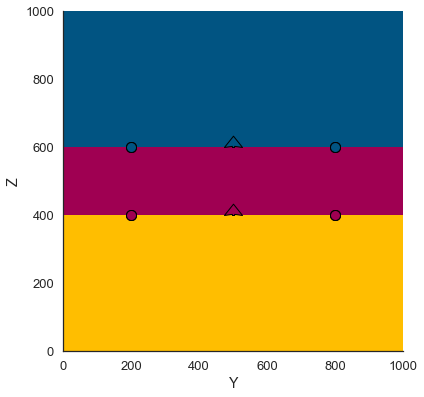

In [189]:
%matplotlib inline
gp.plot.plot_section(geo_data, cell_number=25,
                         direction='x', show_all_data=True)

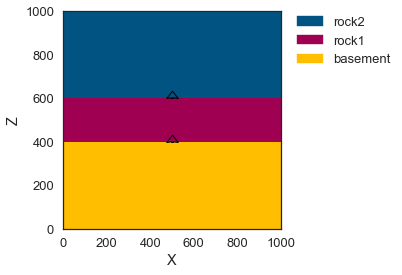

In [190]:
%matplotlib inline
gp.plot.plot_section(geo_data, cell_number=25,
                    direction='y', show_data=True)